In [1]:
import shapefile
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch

(342443.011, 441445.026)

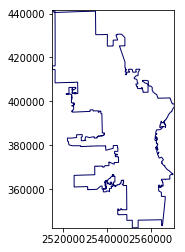

In [21]:
city_shp = shapefile.Reader('../shape/citylimit/citylimit')

plt.figure()
ax = plt.axes()
ax.set_aspect('equal')

polygon = Polygon(shape.points)
patch = PolygonPatch(polygon, edgecolor=[0,0,0.4], facecolor=[1,1,1], alpha=1.0, zorder=2)
ax.add_patch(patch)

plt.xlim(city_shp.bbox[0],city_shp.bbox[2])
plt.ylim(city_shp.bbox[1],city_shp.bbox[3])

(342443.0112500042, 441445.02375000715)

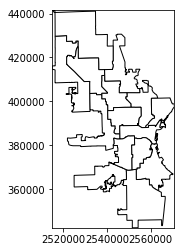

In [22]:
ald_shp = shapefile.Reader("../shape/ald2018/alderman")

plt.figure()
ax = plt.axes()
ax.set_aspect('equal')
icolor = 1

for shape in list(ald_shp.iterShapes()):
    # check number of parts (could use MultiPolygon class of shapely?)
    nparts = len(shape.parts) # total parts
    if nparts == 1:
        polygon = Polygon(shape.points)
        patch = PolygonPatch(polygon, edgecolor=[0,0,0], facecolor=[1,1,1], alpha=1.0, zorder=2)
        ax.add_patch(patch)
    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = len(shape.points)

            polygon = Polygon(shape.points[i0:i1+1])
            patch = PolygonPatch(polygon, edgecolor=[0,0,0], facecolor=[1,1,1], alpha=1.0, zorder=2)
            ax.add_patch(patch)
    icolor = icolor + 1
plt.xlim(ald_shp.bbox[0],ald_shp.bbox[2])
plt.ylim(ald_shp.bbox[1],ald_shp.bbox[3])